# Setup

In [1]:
# import your standard packages
%run ../pkgs.py

# import your local functions
sys.path.insert(1, '../')
from local_functions import *

# make sure the figures plot inline rather than at the end
%matplotlib inline

Default libraries loaded.


# Parameters and Paths

In [2]:
outfn = '../../data/coastal_mask.nc'

# total
lat_bounds = [-1.5, 33]
lon_bounds = [48.5, 102.5]

# regional 
bounds_wAS = [51.125,66,12.5,28]
bounds_eAS = [66,79,3,28]
bounds_wBoB = [79,87,2,28]
bounds_eBoB = [87,103,-5,28]

# Get Data

In [3]:
ds_WOA = xr.open_dataset('../../data/woa_processed.nc')
# ds_WOA

In [4]:
ds_WOD = xr.open_dataset('../../data/wod_processed.nc')
# ds_WOD

In [5]:
# https://www.pacioos.hawaii.edu/metadata/dist2coast_1deg_ocean.html#Distribution_Informationds_mask = xr.open_dataset('../../data/dist2coast_1deg_indian_ocean.nc')
ds_mask = xr.open_dataset('../../data/dist2coast_1deg_indian_ocean.nc')

In [6]:
ds_ro = xr.open_dataset('/tigress/GEOCLIM/LRGROUP/shared_data/pco2_flux_coastal_Roobaert/mask_ocean.nc')

# Interpolate to 1/4 degree

In [7]:
# set land (negative values to nan)

mask_o = np.array(ds_mask.dist)
lon = np.array(ds_mask.lon)
lat = np.array(ds_mask.lat)
xx,yy = np.meshgrid(lon,lat)

mask,bincounts,latbins,lonbins = latlonbin(mask_o.flatten(),yy.flatten(),xx.flatten())

# mask, lat_woa, lon_woa = regrid_2_woa(mask_o,lat,lon)

../local_functions.py:671: RuntimeWarning: Mean of empty slice
  invar_binned_ave[i[0],j[0]] = np.nanmean(group.invar)


## Wide Shelf for eAS and eBoB

In [8]:
# make wide coast dfc
maskw = np.array(mask)
maskw[maskw > 300] = np.nan

/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


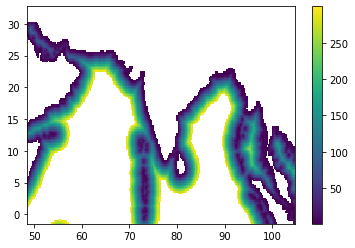

In [9]:
plt.pcolor(lonbins,latbins,maskw)
plt.colorbar()

In [53]:
maskw_ro = ds_ro.mask_coastal2

# total
lat_bounds = [-1.5, 33]
lon_bounds = [48.5, 102.5]

lat_slice = slice(lat_bounds[0], lat_bounds[1])
lon_slice = slice(lon_bounds[0], lon_bounds[1])

#subset gridded data
maskw_ro = maskw_ro.sel(latitude = lat_slice, longitude = lon_slice)

# remove nicobar islands
lat_ro = np.array(maskw_ro.latitude)
lon_ro = np.array(maskw_ro.longitude)
maskw_ro = np.array(maskw_ro).astype(int).T
xx_ro,yy_ro = np.meshgrid(lon_ro,lat_ro)

# remove nicobar islands
maskw_ro = np.where(~((yy_ro>7) & (yy_ro<13.75) & (xx_ro>92) & (xx_ro<94)),maskw_ro,False)


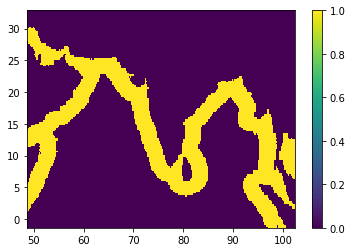

In [54]:
plt.pcolor(lon_ro,lat_ro,maskw_ro)
plt.colorbar()

## Narrow Shelf for wAS and wBoB

In [55]:
maskn = np.array(mask)
maskn[maskn > 150] = np.nan

/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


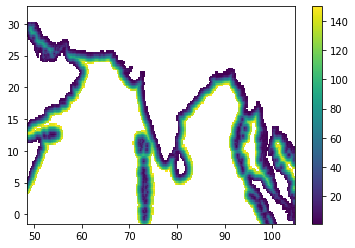

In [56]:
plt.pcolor(lonbins,latbins,maskn)
plt.colorbar()

In [57]:
ds_out=xr.Dataset()

# add to dataset
ds_out['maskw'] = xr.DataArray(maskw,dims = ['lat','lon'],coords =[latbins,lonbins])
ds_out['maskw_ro'] = xr.DataArray(maskw_ro,dims = ['lat_ro','lon_ro'],coords =[lat_ro,lon_ro])
ds_out['maskn'] = xr.DataArray(maskn,dims = ['lat','lon'],coords =[latbins,lonbins])
ds_out

<xarray.Dataset>
Dimensions:   (lat: 138, lat_ro: 138, lon: 226, lon_ro: 216)
Coordinates:
  * lat       (lat) float64 -1.5 -1.25 -1.0 -0.75 -0.5 ... 32.0 32.25 32.5 32.75
  * lon       (lon) float64 48.5 48.75 49.0 49.25 ... 104.0 104.2 104.5 104.8
  * lat_ro    (lat_ro) float64 -1.375 -1.125 -0.875 -0.625 ... 32.38 32.62 32.88
  * lon_ro    (lon_ro) float64 48.62 48.88 49.12 49.38 ... 101.9 102.1 102.4
Data variables:
    maskw     (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    maskw_ro  (lat_ro, lon_ro) int64 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    maskn     (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan

# WOA

In [58]:
xx,yy = np.meshgrid(np.array(ds_WOA.lon),np.array(ds_WOA.lat))
inlat = yy.flatten()
inlon = xx.flatten()

maskw_woa= mask_coast(inlat,inlon,ds_out.maskw,ds_out.lat,ds_out.lon)
maskw_woa = np.reshape(maskw_woa,xx.shape)

maskw_ro_woa= mask_coast(inlat,inlon,ds_out.maskw_ro,ds_out.lat_ro,ds_out.lon_ro)
maskw_ro_woa = np.reshape(maskw_ro_woa,xx.shape)

maskn_woa = mask_coast(inlat,inlon,ds_out.maskn,ds_out.lat,ds_out.lon)
maskn_woa = np.reshape(maskn_woa,xx.shape)

ds_out['maskw_woa'] = xr.DataArray(maskw_woa,dims = ['lat_woa','lon_woa'],coords =[ds_WOA.lat,ds_WOA.lon])
ds_out['maskw_ro_woa'] = xr.DataArray(maskw_ro_woa,dims = ['lat_woa','lon_woa'],coords =[ds_WOA.lat,ds_WOA.lon])
ds_out['maskn_woa'] = xr.DataArray(maskn_woa,dims = ['lat_woa','lon_woa'],coords =[ds_WOA.lat,ds_WOA.lon])

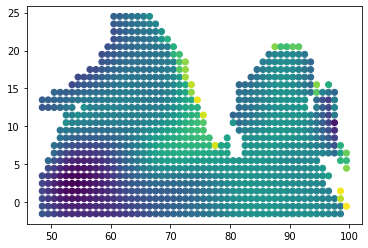

In [59]:
tmp = np.array(ds_WOA.temp_50_200[0,:,:])
plt.scatter(xx,yy,c = tmp)

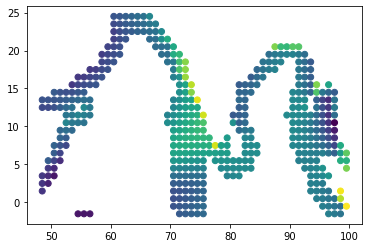

In [60]:
plt.scatter(xx[maskw_woa],yy[maskw_woa],c = tmp[maskw_woa])

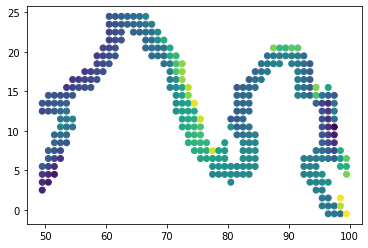

In [61]:
plt.scatter(xx[maskw_ro_woa],yy[maskw_ro_woa],c = tmp[maskw_ro_woa])

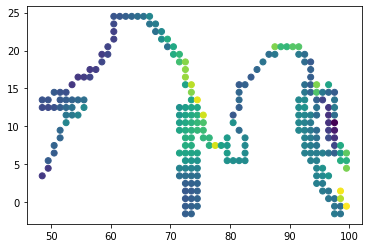

In [62]:
plt.scatter(xx[maskn_woa],yy[maskn_woa],c = tmp[maskn_woa])

# WOD

In [63]:
inlat = ds_WOD.lat
inlon = ds_WOD.lon

maskw_wod = mask_coast(inlat,inlon,ds_out.maskw,ds_out.lat,ds_out.lon)
maskw_ro_wod = mask_coast(inlat,inlon,ds_out.maskw_ro,ds_out.lat_ro,ds_out.lon_ro)
maskn_wod = mask_coast(inlat,inlon,ds_out.maskn,ds_out.lat,ds_out.lon)

ds_out['maskw_wod'] = xr.DataArray(maskw_wod,dims = ['loc_wod'],coords =[np.arange(len(maskw_wod))])
ds_out['maskw_ro_wod'] = xr.DataArray(maskw_ro_wod,dims = ['loc_wod'],coords =[np.arange(len(maskw_wod))])
ds_out['maskn_wod'] = xr.DataArray(maskn_wod,dims = ['loc_wod'],coords =[np.arange(len(maskw_wod))])

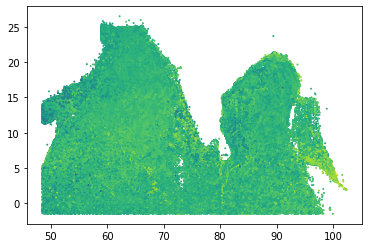

In [64]:
plt.scatter(inlon,inlat,c = ds_WOD.temp_50_200, s = 1)

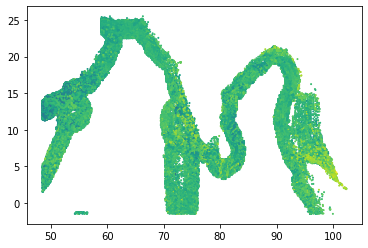

In [65]:
tmp = np.array(ds_WOD.temp_50_200)
plt.scatter(inlon[maskw_wod],inlat[maskw_wod],c = tmp[maskw_wod], s = 1)

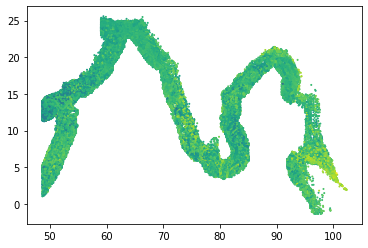

In [66]:
plt.scatter(inlon[maskw_ro_wod],inlat[maskw_ro_wod],c = tmp[maskw_ro_wod], s = 1)

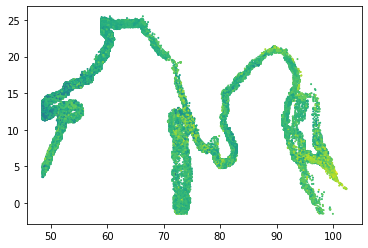

In [67]:
plt.scatter(inlon[maskn_wod],inlat[maskn_wod],c = tmp[maskn_wod], s = 1)

# SAVE

In [68]:
# delete if already present
if os.path.isfile(outfn):
    os.remove(outfn)

ds_out.to_netcdf(outfn,mode='w',format = "NETCDF4")

In [69]:
ds_out

<xarray.Dataset>
Dimensions:       (lat: 138, lat_ro: 138, lat_woa: 35, loc_wod: 314731, lon: 226, lon_ro: 216, lon_woa: 55)
Coordinates:
  * lat           (lat) float64 -1.5 -1.25 -1.0 -0.75 ... 32.0 32.25 32.5 32.75
  * lon           (lon) float64 48.5 48.75 49.0 49.25 ... 104.2 104.5 104.8
  * lat_ro        (lat_ro) float64 -1.375 -1.125 -0.875 ... 32.38 32.62 32.88
  * lon_ro        (lon_ro) float64 48.62 48.88 49.12 49.38 ... 101.9 102.1 102.4
  * lat_woa       (lat_woa) float32 -1.5 -0.5 0.5 1.5 ... 29.5 30.5 31.5 32.5
  * lon_woa       (lon_woa) float32 48.5 49.5 50.5 51.5 ... 100.5 101.5 102.5
  * loc_wod       (loc_wod) int64 0 1 2 3 4 ... 314727 314728 314729 314730
Data variables:
    maskw         (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    maskw_ro      (lat_ro, lon_ro) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    maskn         (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
    maskw_woa     (lat_woa, lon_woa) bool False False Fa